#Theory

Linear Regression is a form of Regression technique that comes under Supervised Machine Learning. In this Method we try to fit the data using the equation of line which is $$y=mx+b$$
where m is the slope of the line and b is the y intercept. Here the x axis the axis of features or the Data given. While y is the label we have to predict. 


To show a real life example where linear regression can be used is as follows.
This is the variations in Google's stock price over the course of 3 years.

![](https://drive.google.com/uc?export=view&id=1iw2E7b9QgNn6HR9zFjs42wLk5bRqqg9t) \\

The best fitting Line that can be drawn would be:
![](https://drive.google.com/uc?export=view&id=1dtiiNGj-GaQSLvH70k2OkaA9OvGAyPMw)
This is called Linear Regression.

Let us take the case of Discrete Variables where a set of Data points is given. As shown in the graph below.

![](https://drive.google.com/uc?export=view&id=1Sym7b9Y5qKFfmTbTRbRpLjztX1re5LjH) \\

Now we try to use Linear Regression on this graph to find the best fitting line for this given Data. The line that comes from Linear Regression is like this.

![](https://drive.google.com/uc?export=view&id=1xLzgCUWOPiX712heb5H3TDEbJaxN-_hi) \\
As you can see almost all the points of regression fit on this given line. With some deviations. Now to calculate error draw a line parallel to the y-axis from a given data point. At the point this line Intersects with our predited regression line will tell you the error. The amount of error is equal to the distance or lenght of this line. We the sum these lenghts for all the points to get the total error in our Approximation. This is also called $R^2$ error. It ranges between 0 and 1 and a higher value corresponds to lower error.
![](https://drive.google.com/uc?export=view&id=1N7hpFYB33Z4_tU1PP4M2PFJhmleKnlPi) \\

##Mathematical Formulation

Here to fit the data we use Least Square fitting according the which for a set of n data points the slope "m" is given by:
$$ m= \sum _{i=0} ^{n} \frac{(x_i - \bar{x})(y_i - \bar{y})}{(x_i - \bar{x})^2}$$
here $x_i$ is the ith Data point in x \\
$y_i$ is the ith Data point in y\\
$\bar{x}$ is the mean of x\\
$\bar{y}$ is mean of y\\

The mean is given by the formula:
$$ \bar{x}=\frac{1}{n}\sum _{i=0} ^{n} x_i  $$

The error we use here is called $R^2$ error which is given by the formula
$$  R^2= \sum _{i=0} ^{n} \frac{(y_p - \bar{y})^2}{(y - \bar{y})^2} $$
where $y_p$ is the predicted Data from regression

#Linear Regression in Python from scratch

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
data= pd.read_csv("/content/salary_data.csv")
print(data.shape)
data.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
x=data['YearsExperience'].values
y=data['Salary'].values

In [ ]:
meanx= np.mean(x)
meany=np.mean(y)
n=len(x)
s_xx= 0
s_yy=0
for i in range(n):
  s_xx+=(x[i]-meanx)*(y[i]-meany)
  s_yy+=(x[i]-meanx)**2

m=s_xx/s_yy
c=meany - m*meanx

print(m,c)


9449.962321455077 25792.20019866869


##Visualizing Prediction

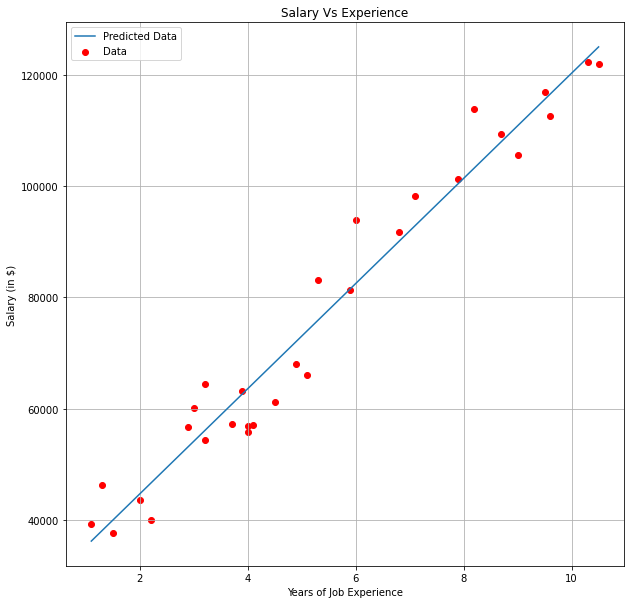

In [ ]:
fig,ax= plt.subplots(1,1,figsize=(10,10))
ax.scatter(x,y,color='red',label='Data')
ax.plot(x,m*x+c,label='Predicted Data')
ax.grid(True)
ax.set_title('Salary Vs Experience')
ax.set_xlabel('Years of Job Experience')
ax.set_ylabel('Salary (in $)')
ax.legend()

## Error

In [ ]:
e_pred=0
e_real=0 
ypred= m*x + c
for i in range(n):
  e_pred+=(y[i]- meany)**2
  e_real+= (y[i]-ypred[i])**2

r2error= 1- (e_real/e_pred)
r2error

0.9569566641435086

#Using Scikit 

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

# Importing the dataset

dataset = pd.read_csv('/content/salary_data.csv')
X = dataset.iloc[:, :-1].values #get a copy of dataset exclude last column
y = dataset.iloc[:, 1].values #get array of dataset in column 1st

# Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=1/3, random_state=0)


# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

# Predicting the Test set results
ypred = regressor.predict(xtest)



##Visualizing Values

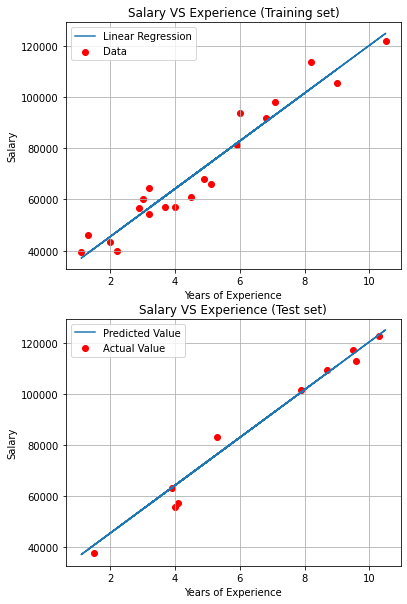

In [ ]:

figure,axis=plt.subplots(2,1,figsize=(6,10))


axis[0].scatter(xtrain, ytrain, color='red',label='Data')
axis[0].plot(xtrain, regressor.predict(xtrain), label='Linear Regression')
axis[0].set_title('Salary VS Experience (Training set)')

axis[1].scatter(xtest, ytest, color='red',label='Actual Value')
axis[1].plot(xtrain, regressor.predict(xtrain), label='Predicted Value')
axis[1].set_title('Salary VS Experience (Test set)')
for ax in axis:
  ax.set_xlabel('Years of Experience')
  ax.set_ylabel('Salary')
  ax.grid(True)
  ax.legend()


## Error

In [ ]:
r2score=regressor.score(X,y)
r2score

0.9565349708076958